I: Test and Train Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv("abalone.csv")

XTrain, XTest = train_test_split(df, test_size=0.3, random_state=42)

XTrain.to_csv('abalone_train.csv', index=False)
XTest.to_csv('abalone_test.csv', index=False)


II:Pearson Correlation Coefficient calculation

In [2]:
import numpy as np

targetMean = XTrain["Rings"].mean()
pearsonCorr = {}
for col in XTrain.columns[:-1]:
    attriMean = XTrain[col].mean()
    num = ((XTrain[col] - attriMean)*(XTrain["Rings"] - targetMean)).sum()
    den = np.sqrt(((XTrain[col] - attriMean)**2).sum()) * np.sqrt(((XTrain["Rings"] - targetMean)**2).sum())
    pearsonCorr[col] = (num/den)

attriWithMaxCorr = max(pearsonCorr, key=pearsonCorr.get)
print("Attribute with maximum pearson correlation with Rings is: ", attriWithMaxCorr)


Attribute with maximum pearson correlation with Rings is:  Shell weight


Simple linear (straight-line) regression model to predict the number of rings

In [3]:
X ,Y = XTrain[attriWithMaxCorr],XTrain["Rings"]
meanX ,meanY= X.mean() , Y.mean()
w = ((X - meanX)*(Y - meanY)).sum() / ((X - meanX)**2).sum()
w0 = meanY - w*meanX
print("The linear regression equation is: y =", w, "(x) +", w0)

The linear regression equation is: y = 14.401800271637445 (x) + 6.508970204283253


Plot the best-fit line on the training data

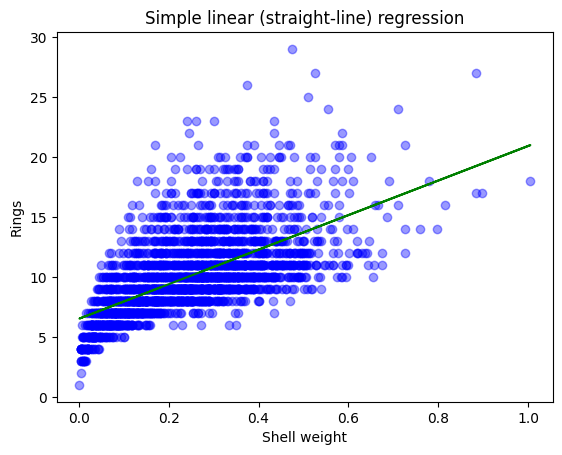

In [4]:
import matplotlib.pyplot as plt

bestLine = w*X + w0

plt.xlabel(attriWithMaxCorr)
plt.ylabel("Rings")
plt.title("Simple linear (straight-line) regression")
plt.scatter(X, Y,alpha=0.4,color='blue')
plt.plot(X, bestLine, color='green')
plt.show()

Prediction accuracy on the training data using root mean squared error

In [5]:
rmseTrain=np.sqrt(((Y-(w*X+w0))**2).sum()/len(X))
print("RMSE of the model on the train data is: ", rmseTrain)

RMSE of the model on the train data is:  2.527846339134725


Prediction accuracy on the test data using root mean squared error

In [6]:
Xtesting ,Ytesting = XTest[attriWithMaxCorr],XTest["Rings"]

YPred=w*Xtesting+w0

rmseTest=np.sqrt(((Ytesting-YPred)**2).sum()/len(XTest))
print("RMSE of the model on the test data is: ", rmseTest)

RMSE of the model on the test data is:  2.467940147010543


Scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data

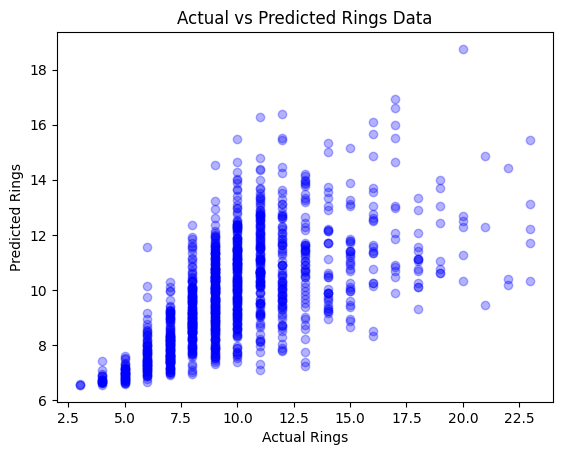

In [7]:
plt.scatter(Ytesting, YPred,alpha=0.3,color='blue')
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs Predicted Rings Data")
plt.show()

III. Simple nonlinear regression model using polynomial curve fitting to predict Rings

Matrices and Prediction function

In [8]:
XTrain3,YTrain3 = XTrain[attriWithMaxCorr],XTrain["Rings"]
XTest3,YTest3 = XTest[attriWithMaxCorr],XTest["Rings"]

def calcZ(X,degree):
    Z = np.ones((len(X),degree+1))
    for i in range(1,degree+1):
        Z[:,i] = X**i
    return Z

def calcW(Z,Y):
    return np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)


def YpredCalc(Z, W):
    return Z.dot(W)


Prediction accuracy on the training data for the different values of degree of the 
polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE). Plot the bar graph of RMSE 
(y-axis) vs different values of degree of the polynomial (x-axis).

RMSE Train Data: [np.float64(2.4992973530791507), np.float64(2.47566923544359), np.float64(2.4671948386515967), np.float64(2.465950052620803)]


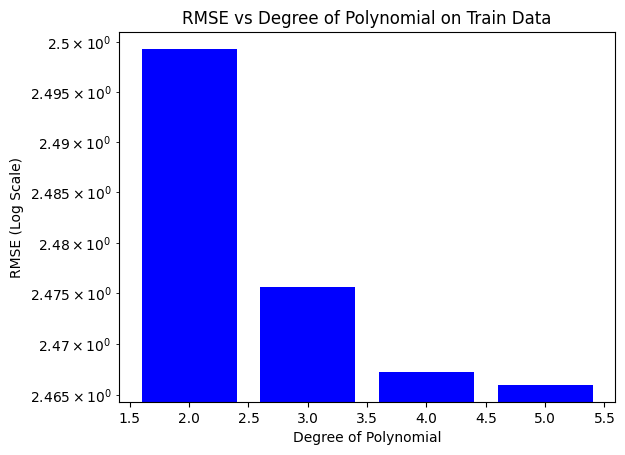

In [9]:
pVal = [2,3,4,5]
rmseTrain3 = []
for p in pVal:
    Z= calcZ(XTrain3,p)
    W= calcW(Z, YTrain3)
    predTrain = YpredCalc(Z, W)
    rmseTrain3.append(np.sqrt(((YTrain3-predTrain)**2).sum()/len(XTrain3)))

print("RMSE Train Data:" ,rmseTrain3)


plt.bar(pVal, rmseTrain3, color='blue')
plt.yscale('log')

plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE (Log Scale)")
plt.title("RMSE vs Degree of Polynomial on Train Data")

plt.show()


Prediction accuracy on the test data for the different values of degree of the 
polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE). Plot the bar graph of RMSE 
(y-axis) vs different values of degree of the polynomial (x-axis). 

RMSE Test Data: [np.float64(2.4337609762689447), np.float64(2.410621681839799), np.float64(2.408325167064205), np.float64(2.4095435183946283)]


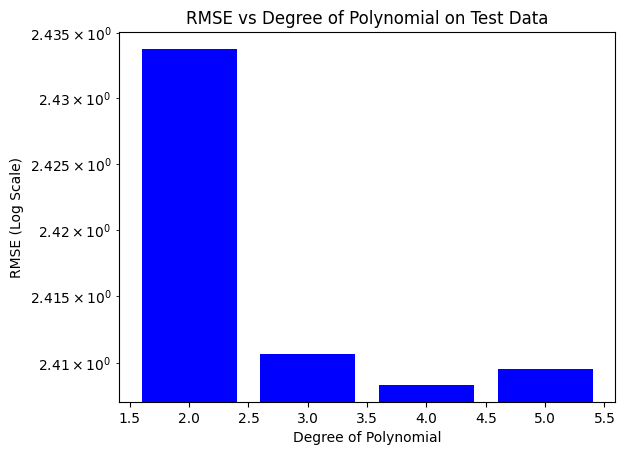

In [10]:
pVal = [2,3,4,5]
rmseTest3 = []
for p in pVal:
    Z= calcZ(XTrain3,p)
    W= calcW(Z, YTrain3)
    ZTest=calcZ(XTest3,p)
    predTest = YpredCalc(ZTest, W)
    rmseTest3.append(np.sqrt(((YTest3-predTest)**2).sum()/len(XTest3)))


print("RMSE Test Data:" ,rmseTest3)


plt.bar(pVal, rmseTest3, color='blue')
plt.yscale('log')

plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE (Log Scale)")
plt.title("RMSE vs Degree of Polynomial on Test Data")

plt.show()

Plot the best-fit curve using the best-fit model on the training data where the x-axis represents 
the chosen attribute value and the y-axis is Rings. (Note: The best-fit model is chosen based on the p-
value for which the test RMSE is minimum.) 

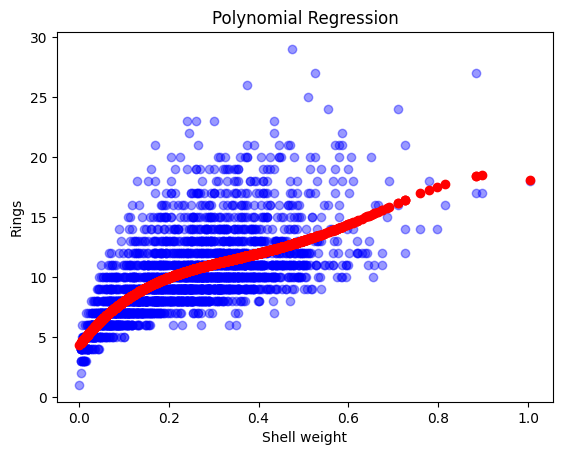

In [11]:
Z= calcZ(XTrain3,4)
W= calcW(Z, YTrain3)
yTrainPred = YpredCalc(Z, W)
plt.scatter(XTrain3, YTrain3,alpha=0.4,color='blue')
plt.scatter(XTrain3, yTrainPred, color='red')
plt.xlabel(attriWithMaxCorr)
plt.ylabel("Rings")
plt.title("Polynomial Regression")
plt.show()